<a href="https://colab.research.google.com/github/suparuek2405/DADS6003_ML/blob/main/Assignment%20week%2013/SVM_and_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 1: SVM

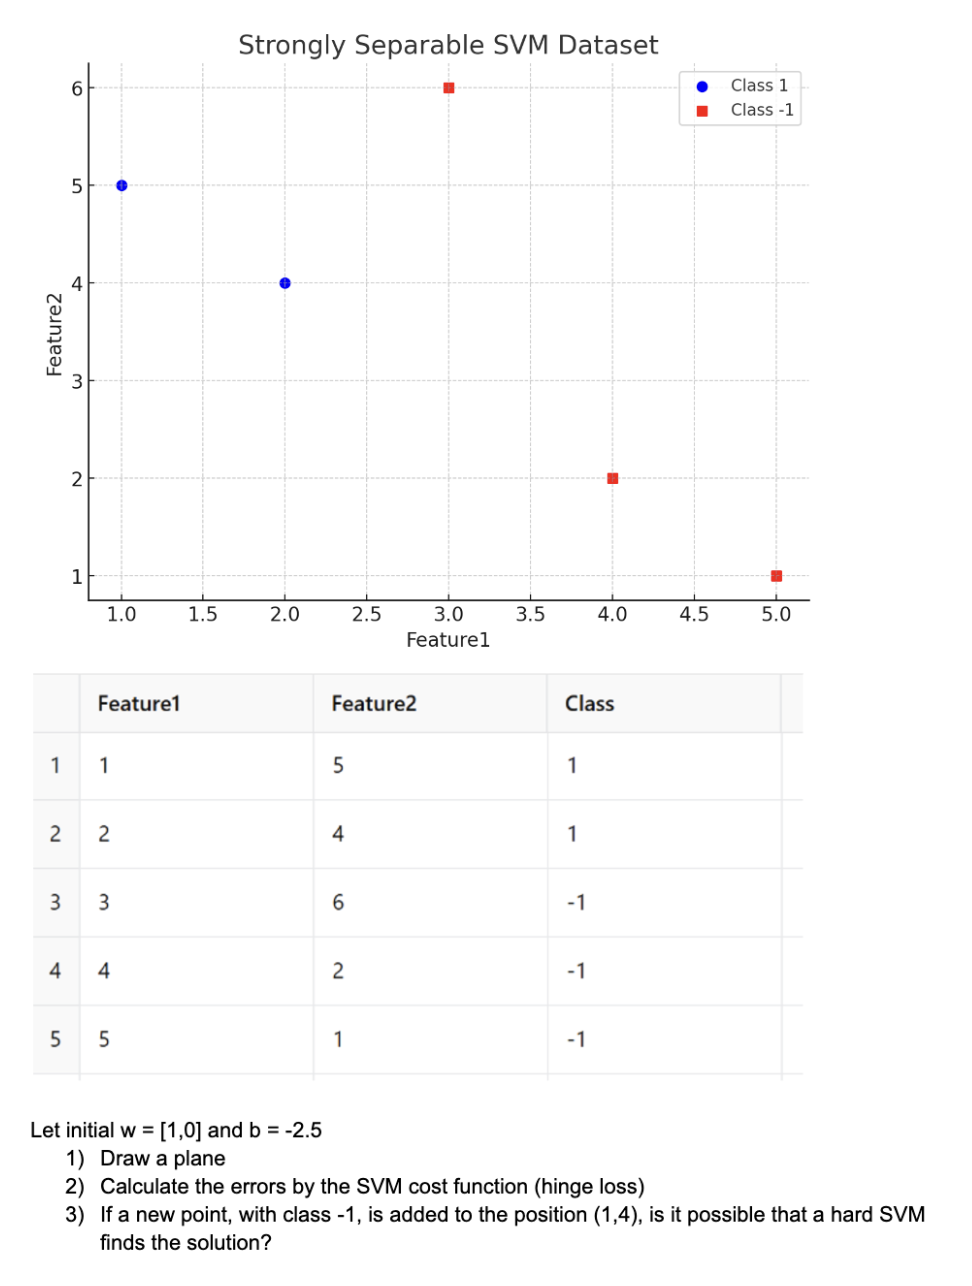

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.array([
    [1, 5, 1],
    [2, 4, 1],
    [3, 6, -1],
    [4, 2, -1],
    [5, 1, -1]
])

In [5]:
X = data[:, :2]  # Features
y = data[:, 2]   # Labels

In [8]:
#initial params
w = np.array([1, 0])
b = -2.5

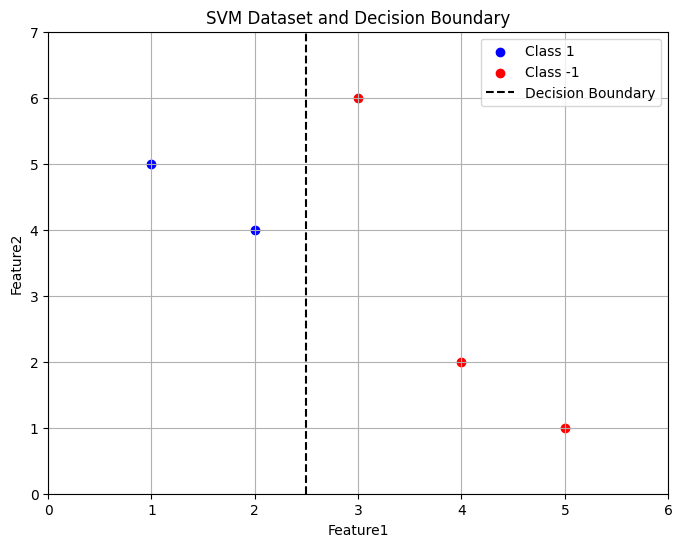

In [14]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')

# Plot decision boundary (x1 = 2.5)
x_boundary = np.linspace(0, 6, 100)
y_boundary = - (w[0] / w[1]) * x_boundary - (b / w[1]) if w[1] != 0 else None
if y_boundary is not None:
    plt.plot(x_boundary, y_boundary, label="Decision Boundary", color="black")
else:
    plt.axvline(-b / w[0], color="black", linestyle="--", label="Decision Boundary")

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("SVM Dataset and Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def hinge_loss(w, b, X, y):
    losses = []
    for i in range(len(X)):
        margin = y[i] * (np.dot(w, X[i]) + b)
        loss = max(0, 1 - margin)
        losses.append(loss)
    return losses

# Calculate hinge losses
losses = hinge_loss(w, b, X, y)

# Print results
for i, loss in enumerate(losses):
    print(f"Point {X[i]} with class {y[i]} has hinge loss: {loss:.2f}")

Point [1 5] with class 1 has hinge loss: 2.50
Point [2 4] with class 1 has hinge loss: 1.50
Point [3 6] with class -1 has hinge loss: 1.50
Point [4 2] with class -1 has hinge loss: 2.50
Point [5 1] with class -1 has hinge loss: 3.50


In [11]:
# Add new point
new_point = np.array([1, 4])  # Features of the new point
new_class = -1               # Class of the new point

# Compute hinge loss for the new point
new_margin = new_class * (np.dot(w, new_point) + b)
new_loss = max(0, 1 - new_margin)

print(f"New point {new_point} with class {new_class} has hinge loss: {new_loss:.2f}")

# Check if hard SVM can separate
if new_loss > 0:
    print("Hard SVM cannot separate the data with the new point added.")
else:
    print("Hard SVM can still separate the data.")

New point [1 4] with class -1 has hinge loss: 0.00
Hard SVM can still separate the data.


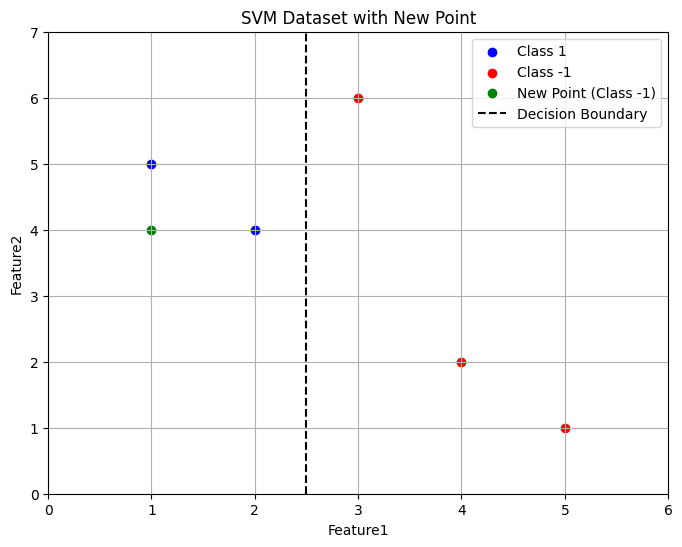

In [20]:
# Add the new point to the plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')


plt.scatter(new_point[0], new_point[1], color='green', label='New Point (Class -1)')

# Plot decision boundary
if y_boundary is not None:
    plt.plot(x_boundary, y_boundary, label="Decision Boundary", color="black")
else:
    plt.axvline(-b / w[0], color="black", linestyle="--", label="Decision Boundary")

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("SVM Dataset with New Point")
plt.legend()
plt.grid(True)
plt.show()

----

### Assignment 2: Kmeans

In [63]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [24]:
url = 'https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week14-kmeans/Mall_Customers.csv'
df = pd.read_csv(url)

In [25]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
categorical_cols = ['Gender']
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [66]:
def calculate_inertia_with_pipeline(df, cluster_range):
    X = df[categorical_cols + numerical_cols]
    inertia_list = []

    for k in cluster_range:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),          # Preprocessing step
            ('kmeans', KMeans(n_clusters=k, random_state=10))  # KMeans clustering
        ])

        pipeline.fit(X)
        inertia_list.append(pipeline.named_steps['kmeans'].inertia_)

    return inertia_list

In [67]:
range_n_clusters = range(2, 10)
inertia_list = calculate_inertia_with_pipeline(df, range_n_clusters)

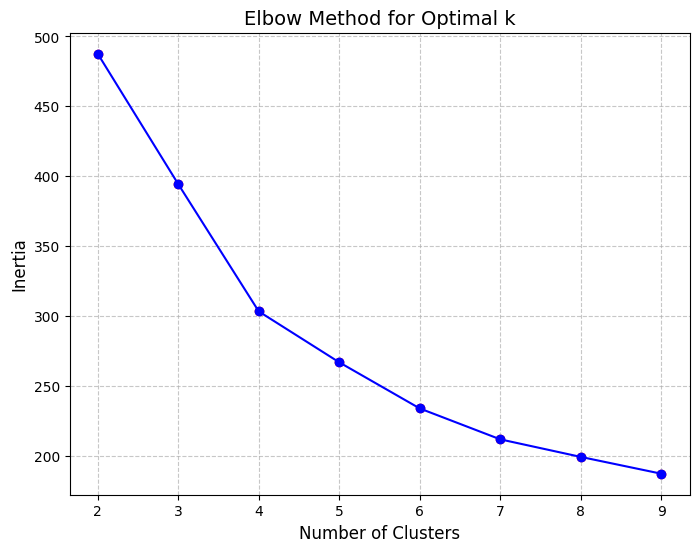

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia_list, marker='o', linestyle='-', color='b')
plt.scatter(range_n_clusters, inertia_list, color='r')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### The best K is 4 because the previous error decreases the most. After 4, it doesn’t decrease as much.

In [78]:
def clustering(df, cluster):
    X = df[categorical_cols + numerical_cols]
    pipeline = Pipeline(steps=
     [('preprocessor', preprocessor),          # Preprocessing step
      ('kmeans', KMeans(n_clusters=cluster, random_state=10))  # KMeans clustering
      ])

    pipeline.fit(X)
    df['cluster'] = pipeline.named_steps['kmeans'].labels_

    return df

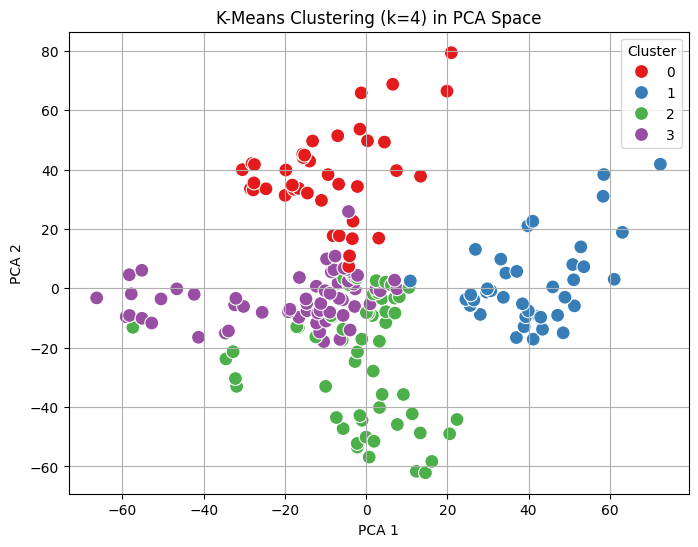

In [82]:
import seaborn as sns
from sklearn.decomposition import PCA

# Fit the KMeans model with k = 4
data = clustering(df, 4)

# Create a ColumnTransformer to handle categorical and numerical features separately
preprocessor_pca = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),  # OneHotEncoder for categorical features
    ])

# Fit and transform the data using the preprocessor
data_processed = preprocessor_pca.fit_transform(data[categorical_cols + numerical_cols])

# Perform PCA for dimensionality reduction on the processed data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_processed)  # Use the processed data for PCA

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, marker='o')
plt.title('K-Means Clustering (k=4) in PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()